# Content:
1. [Riemann approximation](#riemann)
2. [Newton-Cotes formulae](#newton)
3. [Trapezoidal rule](#trap)
4. [Simpson's 1/3 rule](#simp13)

## 1. <a name="riemann">Riemann approximation</a>

![../boardwork2022-120.jpg](../boardwork/boardwork2022-120.jpg)
![../boardwork2022-121.jpg](../boardwork/boardwork2022-121.jpg)
![../boardwork2022-122.jpg](../boardwork/boardwork2022-122.jpg)

Let's test the approximation for $\int_0^\pi dx\,\sin(x)=\left[ -\cos(x)\right]^\pi_0=2$

In [17]:
import numpy as np

a = 0
b = np.pi

# Let's decide the step size using number of grids we want to use
n=100
h = (b - a)/n

print('We are taking ',n,' grids between ',a,' and ',b)
print('Step size, h = ',h)

# Function we want to integrate
def f(x):
    val = np.sin(x)
    return val

# Discretize x
x = np.linspace(a, b, n)

# Left Riemann
I_L = 0
for k in range(0,n-1):
    I_L = I_L + h * f(x[k])
    
# Right Riemann
I_R = 0
for k in range(1,n):
    I_R = I_R + h * f(x[k])
    
# Mid-point Riemann
I_mid = 0
for k in range(0,n-1):
    y_k=(x[k]+x[k+1])/2
    I_mid = I_mid + h * f(y_k)

print('Integral using left-Riemann approximation is ', I_L)
print('Integral using right-Riemann approximation is ', I_R)
print('Integral using mid-point-Riemann approximation is ', I_mid)

We are taking  100  grids between  0  and  3.141592653589793
Step size, h =  0.031415926535897934
Integral using left-Riemann approximation is  1.9798338422550528
Integral using right-Riemann approximation is  1.9798338422550528
Integral using mid-point-Riemann approximation is  1.9800830799182418


Let's see how the error decreases with step size

In [2]:
def Integrate_LRiemenn(f,a,b,n):
    h=(b-a)/n
    x = np.linspace(a, b, n)
    I_L = 0
    for k in range(0,n-1):
        I_L = I_L + h * f(x[k])
    return I_L

def Integrate_midRiemenn(f,a,b,n):
    h=(b-a)/n
    x = np.linspace(a, b, n)
    I_mid = 0
    for k in range(0,n-1):
        y_k=(x[k]+x[k+1])/2
        I_mid = I_mid + h * f(y_k)
    return I_mid

In [3]:
def f(x):
    val = np.sin(x)
    return val

In [4]:
n_steps=[2**10,2**9,2**8,2**7,2**6,2**5,2**4,2**3,2**2,2]
a=0
b=np.pi

In [5]:
steps=[]
error_I_L=[]
for n in n_steps:
    h=(b-a)/n
    steps.append(h)
    I= Integrate_LRiemenn(f,a,b,n) 
    error_I_L.append(np.abs(I-2))
    print('Integral using left-Riemann approximation for h=', h,' is ',I)

Integral using left-Riemann approximation for h= 0.0030679615757712823  is  1.9980453047349203
Integral using left-Riemann approximation for h= 0.006135923151542565  is  1.9960874627908571
Integral using left-Riemann approximation for h= 0.01227184630308513  is  1.9921623018041035
Integral using left-Riemann approximation for h= 0.02454369260617026  is  1.984273809618408
Integral using left-Riemann approximation for h= 0.04908738521234052  is  1.968342013332234
Integral using left-Riemann approximation for h= 0.09817477042468103  is  1.9358415164340417
Integral using left-Riemann approximation for h= 0.19634954084936207  is  1.868141092060096
Integral using left-Riemann approximation for h= 0.39269908169872414  is  1.7205270939201556
Integral using left-Riemann approximation for h= 0.7853981633974483  is  1.3603495231756635
Integral using left-Riemann approximation for h= 1.5707963267948966  is  0.0


In [6]:
error_I_mid=[]
for n in n_steps:
    h=(b-a)/n
    I= Integrate_midRiemenn(f,a,b,n) 
    error_I_mid.append(np.abs(I-2))
    print('Integral using mid-point-Riemann approximation  for h=', h,' is ',I)

Integral using mid-point-Riemann approximation  for h= 0.0030679615757712823  is  1.9980476601326316
Integral using mid-point-Riemann approximation  for h= 0.006135923151542565  is  1.9960968936060606
Integral using mid-point-Riemann approximation  for h= 0.01227184630308513  is  1.9922000991218507
Integral using mid-point-Riemann approximation  for h= 0.02454369260617026  is  1.984425595577799
Integral using mid-point-Riemann approximation  for h= 0.04908738521234052  is  1.968953999674898
Integral using mid-point-Riemann approximation  for h= 0.09817477042468103  is  1.9383293482526616
Integral using mid-point-Riemann approximation  for h= 0.19634954084936207  is  1.8784313354592557
Integral using mid-point-Riemann approximation  for h= 0.39269908169872414  is  1.7647736539512249
Integral using mid-point-Riemann approximation  for h= 0.7853981633974483  is  1.5707963267948968
Integral using mid-point-Riemann approximation  for h= 1.5707963267948966  is  1.5707963267948966


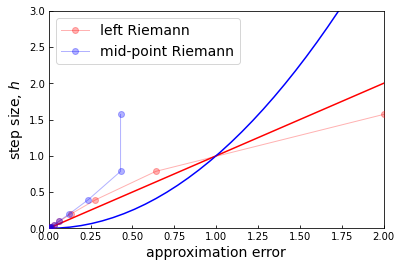

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.tick_params(direction="in",which='both')
ax.set_xlim([0,2])
ax.set_ylim([0,3])

x=np.linspace(0,np.pi)
ax.plot(error_I_L, steps,label='left Riemann',color='red',zorder=3,linewidth=1.0,marker='o',linestyle='-',alpha=0.3)
ax.plot(error_I_mid, steps,label='mid-point Riemann',color='blue',zorder=3,linewidth=1.0,marker='o',linestyle='-',alpha=0.3)
ax.plot(x,x,color='red',linestyle='-')
ax.plot(x,x**2,color='blue',linestyle='-')
ax.legend(frameon=True, loc='upper left',ncol=1,fontsize=14)

plt.xlabel('approximation error', fontsize = 14)
plt.ylabel('step size, $h$', fontsize = 14)
pass

Let's try another example

## 2. <a name="newton">Newton-Cotes formulae</a>

![../boardwork2022-123.jpg](../boardwork/boardwork2022-123.jpg)

## 3. <a name="trap">Trapezoidal rule</a>

![../boardwork2022-124.jpg](../boardwork/boardwork2022-124.jpg)
![../boardwork2022-125.jpg](../boardwork/boardwork2022-125.jpg)

In [20]:
def f(x):
    val = np.sin(x)
    return val

a=0
b=np.pi

n=1024
x = np.linspace(a, b, n)

In [21]:
import scipy.integrate

I=scipy.integrate.trapezoid(f(x),x)
print('Integral using scipy\'s trapezoidal rule is ',I)

Integral using scipy's trapezoidal rule is  1.9999984281999588


## 4. <a name="simp13">Simpson's 1/3 rule</a>

![../boardwork2022-126.jpg](../boardwork/boardwork2022-126.jpg)

In [10]:
I=scipy.integrate.simpson(f(x),x)
print('Integral using scipy\'s trapezoidal rule is ',I)

Integral using scipy's trapezoidal rule is  2.000000010824504
